_This introduction to pandas is derived from Data School's pandas Q&A with my own notes and code on top of what was provided._

## Exploring pandas Series

In [1]:
import pandas as pd

In [2]:
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)

In [3]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**We will be focusing on 2 columns**
- genre (object)
- duration (integer)

In [5]:
# basic summary 
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [7]:
# frequency of different genres
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [8]:
# turn raw counts into percentages
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [9]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

**Hence we can use any Series method such as .head()**
- Every time when you run a method, think of what other DataFrame or Series method we can chain

In [11]:
# finding out unique values
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [13]:
# number of unique values
movies.genre.nunique()

16

In [15]:
# crosstab is useful for explorng the data further
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [17]:
movies.duration.mean()

120.97957099080695

In [18]:
movies.duration.max()

242

In [19]:
movies.duration.min()

64

In [20]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, dtype: int64

**Visualization**

In [21]:
%matplotlib inline

In [22]:
data = movies.duration

In [30]:
data

0      142
1      175
2      200
3      152
4      154
5       96
6      161
7      201
8      195
9      139
10     178
11     148
12     124
13     142
14     179
15     169
16     133
17     207
18     146
19     121
20     136
21     130
22     130
23     106
24     127
25     116
26     175
27     118
28     110
29      87
      ... 
949    103
950    108
951    105
952    117
953    102
954    104
955    157
956    104
957     98
958    109
959     96
960    103
961    114
962     99
963    118
964    150
965    105
966     87
967    136
968    162
969    109
970    107
971     90
972    112
973    126
974    116
975    118
976    138
977    114
978    126
Name: duration, dtype: int64

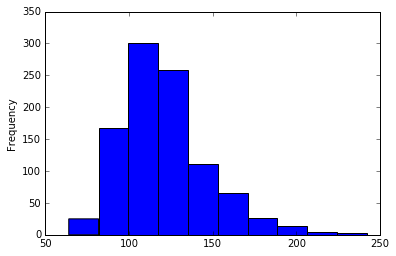

In [25]:
data.plot(kind='hist')

In [26]:
data_counts = movies.genre.value_counts()

In [29]:
data_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

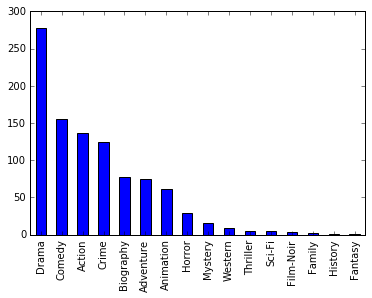

In [28]:
data_counts.plot(kind='bar')